<a href="https://colab.research.google.com/github/AayetMirza/CODSOFT/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 262k/262k [00:00<00:00, 586kB/s]
100% 262k/262k [00:00<00:00, 585kB/s]


In [3]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset= pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns =  ['Gender', 'Surname','Geography','CustomerId']

for column in categorical_columns:
    dataset[column + '_encoded'] = label_encoder.fit_transform(dataset[column])
    dataset = dataset.drop(column, axis=1)




In [11]:
dataset.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Surname_encoded,Geography_encoded,CustomerId_encoded
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,1115,0,2736
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1177,2,3258
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,2040,0,2104
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,289,0,5435
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1822,2,6899


In [12]:
X=dataset.drop(columns='Exited')
y=dataset['Exited']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
training_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.802


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


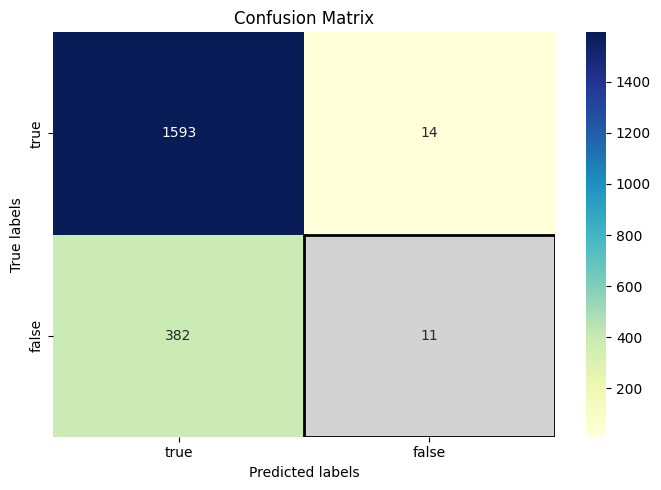

In [14]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')

ax.add_patch(plt.Rectangle((1, 1), 1, 1, fill=True, edgecolor='black', facecolor='lightgray', lw=2))

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['true', 'false'])
ax.yaxis.set_ticklabels(['true', 'false'])

plt.tight_layout()
plt.show()


In [15]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.44      0.03      0.05       393

    accuracy                           0.80      2000
   macro avg       0.62      0.51      0.47      2000
weighted avg       0.73      0.80      0.73      2000

